<a href="https://colab.research.google.com/github/SteAmarante/python-data-science/blob/main/aula_08/Fluxo_Scikit_Learn_Supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparando o ambiente

In [ ]:
#Instale o sklearn
!pip install scikit-learn

In [ ]:
# Importar pacotes essenciais
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Passso a Passo

## Passo 1: Carregar e preparar os dados

In [ ]:
# Carregando dataset exemplo (Câncer de Mama)
dados = load_breast_cancer()
X = dados.data
y = dados.target

# Dividir em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Shape treino:", X_train.shape)
print("Shape teste:", X_test.shape)

Shape treino: (455, 30)
Shape teste: (114, 30)


## Passo 2: Escolher e treinar um modelo

In [ ]:
# Criar e treinar o modelo
modelo = DecisionTreeClassifier(max_depth=5, random_state=42)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

## Passo 3: Fazer previsões nos dados de teste

In [ ]:
# Fazer previsões no conjunto de teste
y_pred = modelo.predict(X_test)

## Passo 4: Avaliar desempenho

In [ ]:
# Avaliar desempenho
print("Acurácia:", accuracy_score(y_test, y_pred))

# Relatório detalhado
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred, target_names=dados.target_names))

Acurácia: 0.9473684210526315

Relatório de Classificação:

              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



##  Passo 5: Visualização – Matriz de Confusão

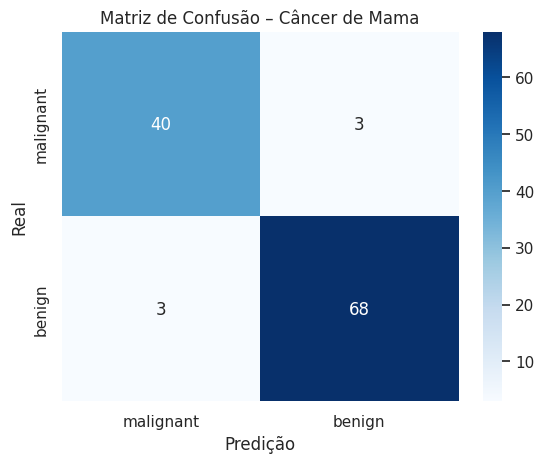

In [ ]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=dados.target_names,
            yticklabels=dados.target_names)
plt.xlabel("Predição")
plt.ylabel("Real")
plt.title("Matriz de Confusão – Câncer de Mama")
plt.show()